In [1]:
import spacy

In [2]:
import json

In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
import os

os.chdir('E:\[editted]\code')

In [5]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp.add_pipe('spacytextblob')

In [6]:
from tqdm import tqdm

Task 1. For each review included in the dataset, use `spacytextblob` and its inherent document-level scores to get the polarity score of the text. Create a violinplot with the x-axis being individual reviews' star rating, and the y-axis being the calculated polarity scores. Interpret the results. 

In [7]:
review_ids = []
ratings = []
polarity_scores = []
subjective_scores = []

with open('yelp_academic_dataset_review_Nov2022_small.jsonl', 'rb') as f:
    line_index = 0
    for line in tqdm(f):
        line_index += 1
        review_dict = json.loads(line)

        review = review_dict['text']
        rating = review_dict['stars']
        review_id = review_dict['review_id']

        review_doc = nlp(review)
        subjective_phrases_in_doc = []
        polarity_score = 0
        subjective_score = 0
        for assess_tuple in review_doc._.blob.sentiment_assessments.assessments:
            subjective_phrases_in_doc.append(' '.join(assess_tuple[0]))
            polarity_score += assess_tuple[1]
            subjective_score += assess_tuple[2]

        ratings.append(rating)
        polarity_scores.append(polarity_score)
        subjective_scores.append(subjective_score)
        review_ids.append(review_id)

10000it [07:46, 21.45it/s]


In [8]:
import pandas as pd
import numpy as np

yelp_df = pd.DataFrame(columns=['review_id', 'rating', 'polarity_score', 'subjective_score'])
yelp_df['rating'] = ratings
yelp_df['review_id'] = review_ids
yelp_df['polarity_score'] = polarity_scores
yelp_df['subjective_score'] = subjective_scores


yelp_df

,review_id,rating,polarity_score,subjective_score
0,KU_O5udG6zpxOg-VcAEodg,3.0,1.023333,5.148333
1,BiTunyQ73aT9WBnpR9DZGw,5.0,4.425000,6.283333
2,saUsX_uimxRlCVr67Z4Jig,3.0,1.539286,5.745238
3,AqPFMleE6RsU23_auESxiA,5.0,2.420455,5.704545
4,Sx8TMOWLNuJBWer-0pcmoA,4.0,5.613571,6.872857
...,...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,5.0,1.800000,1.875000
9996,UIkEO-10J6Y99IhRqUflvg,5.0,0.600000,0.900000
9997,S-NQM3Axcg8JS3MXHUIvyw,5.0,1.097727,6.900758
9998,ME79YrEhm2xe4IQy_0zkGw,5.0,2.812500,4.800000


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='polarity_score'>

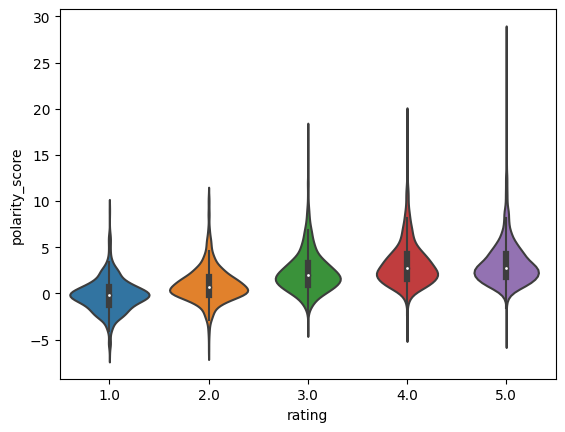

In [10]:
sns.violinplot(x='rating', y='polarity_score', data=yelp_df)

As the levels of review's star rating increase, the median of polarity scores increase. 
Also, compared with lower star rating, higher star rating is more likely to have outliers of the polarity scores. 

Task 2. For each review included in the dataset, extract the subjective phrases in the text using  `spacytextblob` and its `sentiment_assessments.assessments` feature. Then, for each review whose review_id is in the following `target_review_ids` list, find the top 3 reviews that are most similar to it in terms of their subjective phrases.

target_review_ids = ["40thYphUgIfvJq17QCfTwA", "E9AB7V4z8xrt2uPF7T55FQ", "4PHFo_GRG4FEk1q4X7xQVQ", "4KpIldEM-tdnrJLqYzRfZQ", "PDHRlnEdkEcwATry4w71PQ", "meGaFP7yxQdjyABrYDVeoQ", "pgESDcC7eDx4z_epqon4_Q", "qeSxL-POvGLZD6aQ5O9kvw"]

In [11]:
review_ids = []
subjective_phrases_in_docs = []
ratings = []


with open('yelp_academic_dataset_review_Nov2022_small.jsonl', 'rb') as f:
    line_index = 0
    for line in tqdm(f):
        line_index += 1
        review_dict = json.loads(line)

        review = review_dict['text']
        rating = review_dict['stars']
        review_id = review_dict['review_id']

        review_doc = nlp(review)
        subjective_phrases_in_doc = []
        for assess_tuple in review_doc._.blob.sentiment_assessments.assessments:
            subjective_phrases_in_doc.append(' '.join(assess_tuple[0]))
            polarity_score += assess_tuple[1]
            subjective_score += assess_tuple[2]

        ratings.append(rating)
        review_ids.append(review_id)
        subjective_phrases_in_docs.append(subjective_phrases_in_doc)

10000it [07:43, 21.56it/s]


In [12]:
import pandas as pd
yelp_df = pd.DataFrame(columns=['review_id', 'rating','review'])
yelp_df['rating'] = ratings
yelp_df['review_id'] = review_ids
yelp_df['review']= pd.Series(subjective_phrases_in_docs)


yelp_df

,review_id,rating,review
0,KU_O5udG6zpxOg-VcAEodg,3.0,"[aware, multiple !, other, bad, good, very lon..."
1,BiTunyQ73aT9WBnpR9DZGw,5.0,"[nice, clean, amazing, top, fit, easy, advance..."
2,saUsX_uimxRlCVr67Z4Jig,3.0,"[large, chicken, fresh, good, mexican, long, f..."
3,AqPFMleE6RsU23_auESxiA,5.0,"[wow !, different, delicious, favorite, differ..."
4,Sx8TMOWLNuJBWer-0pcmoA,4.0,"[cute, great, beautiful, very good, very, real..."
...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,5.0,"[excellent, same, great]"
9996,UIkEO-10J6Y99IhRqUflvg,5.0,[amazing]
9997,S-NQM3Axcg8JS3MXHUIvyw,5.0,"[outstanding !, great !, other, new, new, bad ..."
9998,ME79YrEhm2xe4IQy_0zkGw,5.0,"[nice, calm, dimly, red, loved, pretty !, grea..."


target review: 40thYphUgIfvJq17QCfTwA

In [13]:
yelp_df.loc[yelp_df['review_id'] == '40thYphUgIfvJq17QCfTwA']

,review_id,rating,review
32,40thYphUgIfvJq17QCfTwA,5.0,"[great, nice, clean, huge]"


In [14]:
yelp_df['review']= yelp_df['review'].astype('string')

In [15]:
vocab_with_freq = dict()

for i in tqdm(range(len(yelp_df))):
    reviews = yelp_df.loc[i, 'review'] 
    for token in nlp(reviews):
                if token.is_alpha:
                    vocab_with_freq[token.lemma_.lower()] = vocab_with_freq.get(token.lemma_.lower(), 0) + 1

vocabulary_list1 = list(vocab_with_freq.keys())


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:05<00:00, 40.68it/s]


In [16]:
one_hot_encodings = []
existent = []

for i in tqdm(range(len(yelp_df))):
    reviews = yelp_df.loc[i, 'review'] 
    token_indices = []
    
    for token in nlp(reviews):
            if  token.is_alpha:
                token_index_in_vocab = vocabulary_list1.index(token.lemma_.lower())
                token_indices.append(token_index_in_vocab)

    one_hot_encoding = np.zeros(len(vocabulary_list1))
    if token_indices:
        existent.append(i)                               
    for token_index in token_indices:
        one_hot_encoding[token_index] = 1

    one_hot_encodings.append(one_hot_encoding)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:13<00:00, 39.46it/s]


In [26]:
from scipy.spatial.distance import cosine

target_review1 = yelp_df.loc[32, 'review']
similarity_values = []
for i in range(len(yelp_df)):
        similarity_value = 1 - cosine(one_hot_encodings[32], one_hot_encodings[i])
        similarity_values.append(similarity_value)
similar_df = pd.DataFrame(columns=['review', 'similarity_value_with_one_hot','review_id','rating'])
similar_df['review'] = yelp_df.loc[0:, 'review'] 
similar_df['review_id'] = yelp_df.loc[0:, 'review_id'] 
similar_df['rating'] = yelp_df.loc[0:, 'rating'] 
similar_df['similarity_value_with_one_hot'] = similarity_values   
similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)
similar_df.nlargest(20, 'similarity_value_with_one_hot')

D:\anaconda\envs\compsoc\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,review,similarity_value_with_one_hot,review_id,rating
32,"['great', 'nice', 'clean', 'huge']",1.000000,40thYphUgIfvJq17QCfTwA,5.0
359,[],1.000000,y1CYqccQLsn8GGXYS4q6tQ,1.0
967,[],1.000000,ssHxl6hukWdxl3CMgs4zyQ,5.0
1710,[],1.000000,J8KTnbCtArCsPKynC4TwyA,5.0
1906,[],1.000000,FK2H5litXdqtSVyhVQjHXg,4.0
2099,[],1.000000,sXwarTV5hiPLAz9DpnVZTw,1.0
3055,[],1.000000,DzEFQ9A01_ct8PKafW7CuA,2.0
3680,[],1.000000,A9mjMfrWWBxBsNFVkys63w,1.0
4281,[],1.000000,JI_89Ib6UMPS0Sb3-jyshA,5.0
4741,[],1.000000,sZdPZLfzDXtCqVVHKiACuw,5.0


top3: pEwlvpFtLSoYok1i9F0Tew, rd-SxP6QX4G9bQMvf8h6Tw, 8u0OyLwKV4TCCglGkzIVVA

target review E9AB7V4z8xrt2uPF7T55FQ

In [102]:
yelp_df.loc[yelp_df['review_id'] == 'E9AB7V4z8xrt2uPF7T55FQ']

,review_id,rating,review
39,E9AB7V4z8xrt2uPF7T55FQ,5.0,"['amazing', 'blank', 'great', 'highly', 'busy']"


In [27]:
target_review2 = yelp_df.loc[39, 'review']
similarity_values = []
for i in range(len(yelp_df)):
        similarity_value = 1 - cosine(one_hot_encodings[39], one_hot_encodings[i])
        similarity_values.append(similarity_value)
similar_df = pd.DataFrame(columns=['review', 'similarity_value_with_one_hot','review_id','rating'])
similar_df['review'] = yelp_df.loc[0:, 'review'] 
similar_df['review_id'] = yelp_df.loc[0:, 'review_id'] 
similar_df['rating'] = yelp_df.loc[0:, 'rating'] 
similar_df['similarity_value_with_one_hot'] = similarity_values   
similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)
similar_df.nlargest(20, 'similarity_value_with_one_hot')

D:\anaconda\envs\compsoc\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,review,similarity_value_with_one_hot,review_id,rating
39,"['amazing', 'blank', 'great', 'highly', 'busy']",1.000000,E9AB7V4z8xrt2uPF7T55FQ,5.0
359,[],1.000000,y1CYqccQLsn8GGXYS4q6tQ,1.0
967,[],1.000000,ssHxl6hukWdxl3CMgs4zyQ,5.0
1710,[],1.000000,J8KTnbCtArCsPKynC4TwyA,5.0
1906,[],1.000000,FK2H5litXdqtSVyhVQjHXg,4.0
2099,[],1.000000,sXwarTV5hiPLAz9DpnVZTw,1.0
3055,[],1.000000,DzEFQ9A01_ct8PKafW7CuA,2.0
3680,[],1.000000,A9mjMfrWWBxBsNFVkys63w,1.0
4281,[],1.000000,JI_89Ib6UMPS0Sb3-jyshA,5.0
4741,[],1.000000,sZdPZLfzDXtCqVVHKiACuw,5.0


top3: 7mXLFyRhOLIuPtmo2Fz6wQ, CaWB7BQPGXUli37SH9ks6g, oa3MfdQvCz_BoU0UXVEDlw

target review 4PHFo_GRG4FEk1q4X7xQVQ

In [116]:
yelp_df.loc[yelp_df['review_id'] == '4PHFo_GRG4FEk1q4X7xQVQ']

,review_id,rating,review
96,4PHFo_GRG4FEk1q4X7xQVQ,5.0,"['great ! ! ! ! ! ! ! ! !', 'completely new', ..."


In [38]:
target_review3 = yelp_df.loc[96, 'review']
similarity_values = []
for i in range(len(yelp_df)):
        similarity_value = 1 - cosine(one_hot_encodings[96], one_hot_encodings[i])
        similarity_values.append(similarity_value)
similar_df = pd.DataFrame(columns=['review', 'similarity_value_with_one_hot','review_id','rating'])
similar_df['review'] = yelp_df.loc[0:, 'review'] 
similar_df['review_id'] = yelp_df.loc[0:, 'review_id'] 
similar_df['rating'] = yelp_df.loc[0:, 'rating'] 
similar_df['similarity_value_with_one_hot'] = similarity_values   
similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)
similar_df.nlargest(20, 'similarity_value_with_one_hot')

D:\anaconda\envs\compsoc\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,review,similarity_value_with_one_hot,review_id,rating
96,"['great ! ! ! ! ! ! ! ! !', 'completely new', ...",1.000000,4PHFo_GRG4FEk1q4X7xQVQ,5.0
359,[],1.000000,y1CYqccQLsn8GGXYS4q6tQ,1.0
967,[],1.000000,ssHxl6hukWdxl3CMgs4zyQ,5.0
1710,[],1.000000,J8KTnbCtArCsPKynC4TwyA,5.0
1906,[],1.000000,FK2H5litXdqtSVyhVQjHXg,4.0
2099,[],1.000000,sXwarTV5hiPLAz9DpnVZTw,1.0
3055,[],1.000000,DzEFQ9A01_ct8PKafW7CuA,2.0
3680,[],1.000000,A9mjMfrWWBxBsNFVkys63w,1.0
4281,[],1.000000,JI_89Ib6UMPS0Sb3-jyshA,5.0
4741,[],1.000000,sZdPZLfzDXtCqVVHKiACuw,5.0


top3: 52phbw4zW9_EEaU_q9c3bQ, 68gtY300yDEp4Frpa3NO7A, xP34Liue5plDCf59FPvchA	

4KpIldEM-tdnrJLqYzRfZQ

In [117]:
yelp_df.loc[yelp_df['review_id'] == '4KpIldEM-tdnrJLqYzRfZQ']

,review_id,rating,review
66,4KpIldEM-tdnrJLqYzRfZQ,5.0,"['only', 'awesome !', 'freshly filled', 'pheno..."


In [39]:
target_review4 = yelp_df.loc[66, 'review']
similarity_values = []
for i in range(len(yelp_df)):
        similarity_value = 1 - cosine(one_hot_encodings[66], one_hot_encodings[i])
        similarity_values.append(similarity_value)
similar_df = pd.DataFrame(columns=['review', 'similarity_value_with_one_hot','review_id','rating'])
similar_df['review'] = yelp_df.loc[0:, 'review'] 
similar_df['review_id'] = yelp_df.loc[0:, 'review_id'] 
similar_df['rating'] = yelp_df.loc[0:, 'rating'] 
similar_df['similarity_value_with_one_hot'] = similarity_values   
similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)
similar_df.nlargest(20, 'similarity_value_with_one_hot')

D:\anaconda\envs\compsoc\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,review,similarity_value_with_one_hot,review_id,rating
66,"['only', 'awesome !', 'freshly filled', 'pheno...",1.000000,4KpIldEM-tdnrJLqYzRfZQ,5.0
359,[],1.000000,y1CYqccQLsn8GGXYS4q6tQ,1.0
967,[],1.000000,ssHxl6hukWdxl3CMgs4zyQ,5.0
1710,[],1.000000,J8KTnbCtArCsPKynC4TwyA,5.0
1906,[],1.000000,FK2H5litXdqtSVyhVQjHXg,4.0
2099,[],1.000000,sXwarTV5hiPLAz9DpnVZTw,1.0
3055,[],1.000000,DzEFQ9A01_ct8PKafW7CuA,2.0
3680,[],1.000000,A9mjMfrWWBxBsNFVkys63w,1.0
4281,[],1.000000,JI_89Ib6UMPS0Sb3-jyshA,5.0
4741,[],1.000000,sZdPZLfzDXtCqVVHKiACuw,5.0


In [ ]:
top3:AlPGnDHtaE2Kf8Kk6Dtbig, 2QLcXtfzQCBv0j7gbI_T7g, X0A_5FDCK2mnGF5rHjQ3Ng

PDHRlnEdkEcwATry4w71PQ

In [119]:
yelp_df.loc[yelp_df['review_id'] == 'PDHRlnEdkEcwATry4w71PQ']

,review_id,rating,review
73,PDHRlnEdkEcwATry4w71PQ,1.0,"['plain', 'unable', 'back', 'actual', 'back', ..."


In [37]:
target_review5 = yelp_df.loc[73, 'review']
similarity_values = []
for i in range(len(yelp_df)):
        similarity_value = 1 - cosine(one_hot_encodings[73], one_hot_encodings[i])
        similarity_values.append(similarity_value)
similar_df = pd.DataFrame(columns=['review', 'similarity_value_with_one_hot','review_id','rating'])
similar_df['review'] = yelp_df.loc[0:, 'review'] 
similar_df['review_id'] = yelp_df.loc[0:, 'review_id'] 
similar_df['rating'] = yelp_df.loc[0:, 'rating'] 
similar_df['similarity_value_with_one_hot'] = similarity_values   
similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)
similar_df.nlargest(20, 'similarity_value_with_one_hot')

D:\anaconda\envs\compsoc\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,review,similarity_value_with_one_hot,review_id,rating
73,"['plain', 'unable', 'back', 'actual', 'back', ...",1.000000,PDHRlnEdkEcwATry4w71PQ,1.0
359,[],1.000000,y1CYqccQLsn8GGXYS4q6tQ,1.0
967,[],1.000000,ssHxl6hukWdxl3CMgs4zyQ,5.0
1710,[],1.000000,J8KTnbCtArCsPKynC4TwyA,5.0
1906,[],1.000000,FK2H5litXdqtSVyhVQjHXg,4.0
2099,[],1.000000,sXwarTV5hiPLAz9DpnVZTw,1.0
3055,[],1.000000,DzEFQ9A01_ct8PKafW7CuA,2.0
3680,[],1.000000,A9mjMfrWWBxBsNFVkys63w,1.0
4281,[],1.000000,JI_89Ib6UMPS0Sb3-jyshA,5.0
4741,[],1.000000,sZdPZLfzDXtCqVVHKiACuw,5.0


meGaFP7yxQdjyABrYDVeoQ

top3: NzvlG7XNjk5cKaCPtZa, 43Bc6ufpZZd5L7BcvcXDlg,  88BzbGaEJjnDmZp_jfq-GA	

In [120]:
yelp_df.loc[yelp_df['review_id'] == 'meGaFP7yxQdjyABrYDVeoQ']

,review_id,rating,review
84,meGaFP7yxQdjyABrYDVeoQ,1.0,"['seriously', 'chicken', 'good']"


In [36]:
target_review6 = yelp_df.loc[84, 'review']
similarity_values = []
for i in range(len(yelp_df)):
        similarity_value = 1 - cosine(one_hot_encodings[84], one_hot_encodings[i])
        similarity_values.append(similarity_value)
similar_df = pd.DataFrame(columns=['review', 'similarity_value_with_one_hot','review_id','rating'])
similar_df['review'] = yelp_df.loc[0:, 'review'] 
similar_df['review_id'] = yelp_df.loc[0:, 'review_id'] 
similar_df['rating'] = yelp_df.loc[0:, 'rating'] 
similar_df['similarity_value_with_one_hot'] = similarity_values   
similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)
similar_df.nlargest(20, 'similarity_value_with_one_hot')

D:\anaconda\envs\compsoc\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,review,similarity_value_with_one_hot,review_id,rating
84,"['seriously', 'chicken', 'good']",1.000000,meGaFP7yxQdjyABrYDVeoQ,1.0
359,[],1.000000,y1CYqccQLsn8GGXYS4q6tQ,1.0
967,[],1.000000,ssHxl6hukWdxl3CMgs4zyQ,5.0
1710,[],1.000000,J8KTnbCtArCsPKynC4TwyA,5.0
1906,[],1.000000,FK2H5litXdqtSVyhVQjHXg,4.0
2099,[],1.000000,sXwarTV5hiPLAz9DpnVZTw,1.0
3055,[],1.000000,DzEFQ9A01_ct8PKafW7CuA,2.0
3680,[],1.000000,A9mjMfrWWBxBsNFVkys63w,1.0
4281,[],1.000000,JI_89Ib6UMPS0Sb3-jyshA,5.0
4741,[],1.000000,sZdPZLfzDXtCqVVHKiACuw,5.0


top3:WJeFbLeLzDyUIqHa2zlrMw, MwViosFJI_DGKbKt-7qVFg, DJKV8RQ_tdSh_bEMjFfFaA	

pgESDcC7eDx4z_epqon4_Q

In [121]:
yelp_df.loc[yelp_df['review_id'] == 'pgESDcC7eDx4z_epqon4_Q']

,review_id,rating,review
424,pgESDcC7eDx4z_epqon4_Q,1.0,"['half', 'completely', 'top', 'surprised', 'sw..."


In [32]:
target_review7 = yelp_df.loc[424, 'review']
similarity_values = []
for i in range(len(yelp_df)):
        similarity_value = 1 - cosine(one_hot_encodings[32], one_hot_encodings[i])
        similarity_values.append(similarity_value)
similar_df = pd.DataFrame(columns=['review', 'similarity_value_with_one_hot','review_id','rating'])
similar_df['review'] = yelp_df.loc[0:, 'review'] 
similar_df['review_id'] = yelp_df.loc[0:, 'review_id'] 
similar_df['rating'] = yelp_df.loc[0:, 'rating'] 
similar_df['similarity_value_with_one_hot'] = similarity_values   
similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)
similar_df.nlargest(20, 'similarity_value_with_one_hot')

D:\anaconda\envs\compsoc\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,review,similarity_value_with_one_hot,review_id,rating
32,"['great', 'nice', 'clean', 'huge']",1.000000,40thYphUgIfvJq17QCfTwA,5.0
359,[],1.000000,y1CYqccQLsn8GGXYS4q6tQ,1.0
967,[],1.000000,ssHxl6hukWdxl3CMgs4zyQ,5.0
1710,[],1.000000,J8KTnbCtArCsPKynC4TwyA,5.0
1906,[],1.000000,FK2H5litXdqtSVyhVQjHXg,4.0
2099,[],1.000000,sXwarTV5hiPLAz9DpnVZTw,1.0
3055,[],1.000000,DzEFQ9A01_ct8PKafW7CuA,2.0
3680,[],1.000000,A9mjMfrWWBxBsNFVkys63w,1.0
4281,[],1.000000,JI_89Ib6UMPS0Sb3-jyshA,5.0
4741,[],1.000000,sZdPZLfzDXtCqVVHKiACuw,5.0


top3: pEwlvpFtLSoYok1i9F0Tew rd-SxP6QX4G9bQMvf8h6Tw 8u0OyLwKV4TCCglGkzIVVA

qeSxL-POvGLZD6aQ5O9kvw

In [122]:
yelp_df.loc[yelp_df['review_id'] == 'qeSxL-POvGLZD6aQ5O9kvw']

,review_id,rating,review
347,qeSxL-POvGLZD6aQ5O9kvw,1.0,"['rarely', 'honestly', 'worst', 'objectively h..."


In [35]:
target_review8 = yelp_df.loc[347, 'review']
similarity_values = []
for i in range(len(yelp_df)):
        similarity_value = 1 - cosine(one_hot_encodings[347], one_hot_encodings[i])
        similarity_values.append(similarity_value)
similar_df = pd.DataFrame(columns=['review', 'similarity_value_with_one_hot','review_id','rating'])
similar_df['review'] = yelp_df.loc[0:, 'review'] 
similar_df['review_id'] = yelp_df.loc[0:, 'review_id'] 
similar_df['rating'] = yelp_df.loc[0:, 'rating'] 
similar_df['similarity_value_with_one_hot'] = similarity_values   
similar_df.sort_values(by='similarity_value_with_one_hot', ascending=False)
similar_df.nlargest(20, 'similarity_value_with_one_hot')

D:\anaconda\envs\compsoc\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,review,similarity_value_with_one_hot,review_id,rating
347,"['rarely', 'honestly', 'worst', 'objectively h...",1.000000,qeSxL-POvGLZD6aQ5O9kvw,1.0
359,[],1.000000,y1CYqccQLsn8GGXYS4q6tQ,1.0
967,[],1.000000,ssHxl6hukWdxl3CMgs4zyQ,5.0
1710,[],1.000000,J8KTnbCtArCsPKynC4TwyA,5.0
1906,[],1.000000,FK2H5litXdqtSVyhVQjHXg,4.0
2099,[],1.000000,sXwarTV5hiPLAz9DpnVZTw,1.0
3055,[],1.000000,DzEFQ9A01_ct8PKafW7CuA,2.0
3680,[],1.000000,A9mjMfrWWBxBsNFVkys63w,1.0
4281,[],1.000000,JI_89Ib6UMPS0Sb3-jyshA,5.0
4741,[],1.000000,sZdPZLfzDXtCqVVHKiACuw,5.0


tops: nq1fiAgbmKaxb8bktZNphw LKXD9GUeSrlSAChRVA2E4g	 RZq-EioVPJpBgwbN2aFmVw

 For each of the target reviews, what are the top 3 reviews that are most similar to it in terms of their subjective phrases?
 

40thYphUgIfvJq17QCfTwA: [pEwlvpFtLSoYok1i9F0Tew, rd-SxP6QX4G9bQMvf8h6Tw, 8u0OyLwKV4TCCglGkzIVVA]

E9AB7V4z8xrt2uPF7T55FQ: [7mXLFyRhOLIuPtmo2Fz6wQ, CaWB7BQPGXUli37SH9ks6g, oa3MfdQvCz_BoU0UXVEDlw]

4PHFo_GRG4FEk1q4X7xQVQ: [52phbw4zW9_EEaU_q9c3bQ, 68gtY300yDEp4Frpa3NO7A, xP34Liue5plDCf59FPvchA]

4KpIldEM-tdnrJLqYzRfZQ: [AlPGnDHtaE2Kf8Kk6Dtbig, 2QLcXtfzQCBv0j7gbI_T7g, X0A_5FDCK2mnGF5rHjQ3Ng]

PDHRlnEdkEcwATry4w71PQ: [NzvlG7XNjk5cKaCPtZa, 43Bc6ufpZZd5L7BcvcXDlg, 88BzbGaEJjnDmZp_jfq-GA]

meGaFP7yxQdjyABrYDVeoQ: [WJeFbLeLzDyUIqHa2zlrMw, MwViosFJI_DGKbKt-7qVFg, DJKV8RQ_tdSh_bEMjFfFaA ]

pgESDcC7eDx4z_epqon4_Q: [pEwlvpFtLSoYok1i9F0Tew, rd-SxP6QX4G9bQMvf8h6Tw, 8u0OyLwKV4TCCglGkzIVVA]

qeSxL-POvGLZD6aQ5O9kvw: [nq1fiAgbmKaxb8bktZNphw, LKXD9GUeSrlSAChRVA2E4g,RZq-EioVPJpBgwbN2aFmVw]

What is the rating of each of the target reviews? What about the rating of their top 3 most similar reviews? Are they correlated? Interpret the results.

for the first four target reviews, there is a positive correlation between the rating of their top 3 most similar reviews and their ratings.
for the last four target reviews, there is a negative correlation between the rating of their top 3 most similar reviews and their ratings.